In [22]:
import numpy as np
import pandas as pd 

In [23]:

df = pd.read_csv("SMSSpamCollection.csv", sep="\t", header=None, names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.shape

(5572, 2)

1.Data cleaning

2.EDA

3.Text preprocessing

4.Model building

5.Evaluation

6.Improvements

1.Data cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.rename(columns={"label": "target","message":"text"}, inplace=True)
df.sample(5)

,target,text
3505,ham,Will you be here for food
4119,ham,Watch lor. I saw a few swatch one i thk quite ...
4287,ham,Congrats. That's great. I wanted to tell you n...
461,ham,Where did u go? My phone is gonna die you have...
5113,ham,U definitely need a module from e humanities d...


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
#duplicate values
df.duplicated().sum()

np.int64(403)

In [30]:
#remove duplicates
df = df.drop_duplicates(keep="first")
df.duplicated().sum()
df.shape

(5169, 2)

Exploratory Data Analysis

It’s the phase where you dig into your dataset before modeling to understand its structure, patterns, and problems. Think of it as detective work—getting to know the data so you don’t go in blind.

In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

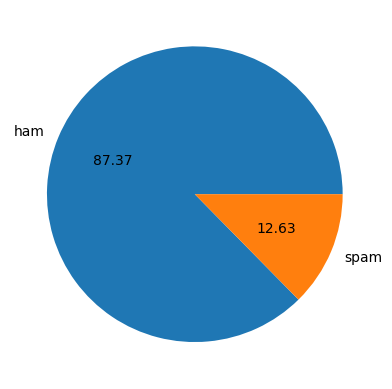

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_of_characters']=df['text'].apply(len)
df.head()


,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")   # new resource required in NLTK>=3.9

df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(str(x))))
df.head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df["num_of_sentence"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(str(x))))
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#ham
df[df['target']==0][['num_of_characters','num_of_words','num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#spam
df[df['target']==1][['num_of_characters','num_of_words','num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [42]:
import seaborn as sns


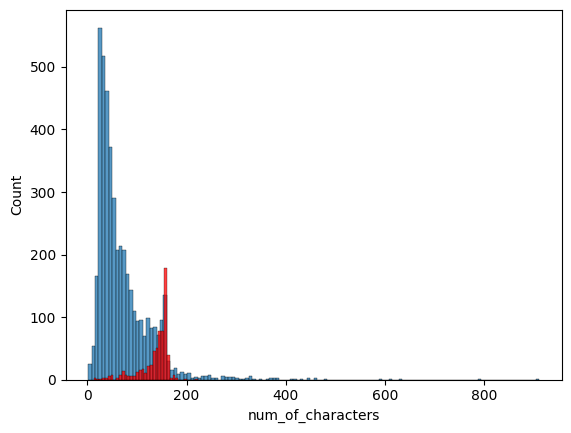

In [52]:
sns.histplot(df[df['target']==0]['num_of_characters'])
sns.histplot(df[df['target']==1]['num_of_characters'],color='red')
plt.show()

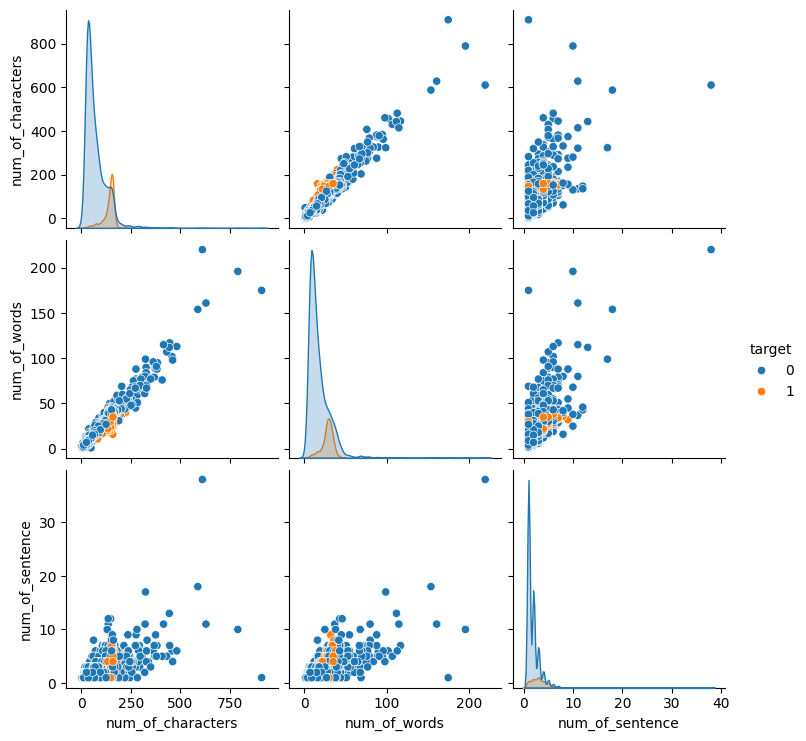

In [51]:
sns.pairplot(df,hue='target')
plt.show()


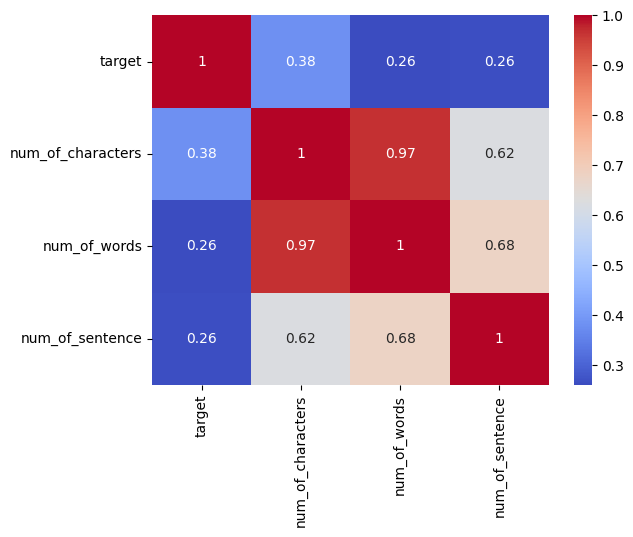

In [56]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [69]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

3. Data preprocessing


Lower case

Tokenization

Removing special characters

Removing punctuation

Stemming

In [70]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [ ]:
def transform_text(text):
    #lowercase
    text= text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    y=[]
    # alphanumeric filtering
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    #stopword removal and punctuation removal
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))

    return y


In [89]:
df['transformed_text']=df['text'].apply(transform_text)

In [90]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf, lives, around, though]"


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)



9982

C:\Users\User\AppData\Local\Temp\ipykernel_8136\2907013637.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=df_wc, palette="viridis")


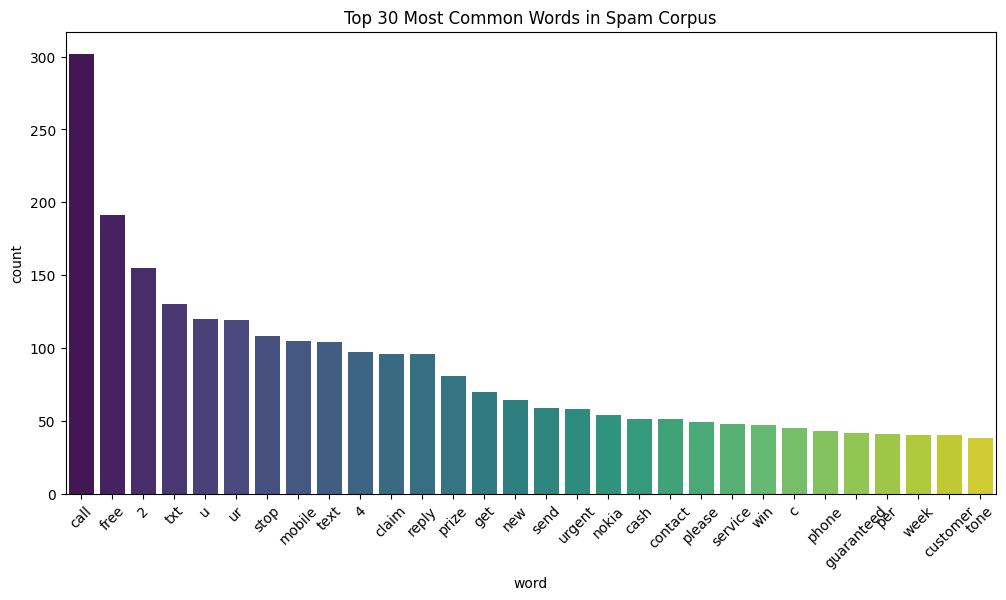

In [97]:
from collections import Counter


# Count word frequencies
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_wc = pd.DataFrame(word_counts, columns=["word", "count"])

# Plot with seaborn
plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=df_wc, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


In [110]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

X=tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x))).toarray()
X.shape

(5169, 8079)

In [111]:
y=df['target'].values

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [114]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8839458413926499
[[809  99]
 [ 21 105]]
0.5147058823529411


In [115]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9574468085106383
[[908   0]
 [ 44  82]]
1.0


In [116]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[903   5]
 [ 30  96]]
0.9504950495049505


In [117]:
import pickle

# save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# save model
with open("spam_model.pkl", "wb") as f:
    pickle.dump(mnb, f)
